# Logistic Regression

### Architecture
    * Relu in hidden layers and sigmoid in the output layer
    * Number of layers and number of units in each layer can be set using `layers_dims` hyper-parameter
    * Uses sigmoid cross entropy for loss computation
   
### Dependencies
    * Numpy
    * Matplotlib

## Import dependencies

In [1]:
import numpy as np
from utils.sc_utils import load_data, plot_training

## Parameters Initialization

In [2]:
def initialize_parameters(layers_dims):
    '''
    Arguments:
    layers_dims -- a list of dimensions of each layer of our network
    
    Returns:
    parameters -- a dictionary containing weights and biases of the network
    '''

    parameters = {}
    for l in range(len(layers_dims)-1):
        parameters['W' + str(l+1)] = np.random.randn(layers_dims[l+1], layers_dims[l]) * 0.01
        parameters['b' + str(l+1)] = np.zeros([layers_dims[l+1], 1])
    
    return parameters

## Forward Propogation

In [3]:
def relu(X):
    return np.maximum(X, 0)

def softmax(X):
    t = np.exp(X)
    return  t / np.sum(t, axis=0)

In [4]:
def forward_propogation(A, parameters):
    '''
    Implement the forward propogation in the network
    
    Arguments:
    A -- input to the network
    parameters -- a dictionary containing weights and biases of the network
    
    Returns:
    A -- Post activation value of the last layer
    caches -- cache of all activation values, required for backpropogation 
    '''
    
    L = len(parameters) // 2 # no. of layers
    caches  = {}
    for l in range(L):
        W = parameters['W' + str(l+1)]
        b = parameters['b' + str(l+1)]
        Z = np.dot(W, A) + b
        A = relu(Z) if l<L-1 else softmax(Z) # relu in hidden layers and sigmoid in output layer
        caches['A' + str(l+1)] = A
        caches['Z' + str(l+1)] = Z

    return A, caches

## Cost Computation

In [5]:
def compute_cost(AL, Y):
    """
    Implement the cost function for the network

    Arguments:
    AL -- probability vector corresponding to the label predictions, shape (1, number of examples)
    Y -- true "label" vector, shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

## Backward Propogation

In [6]:
def relu_backward(grad_A, Z):
    grad_A[Z<=0] = 0
    return grad_A

In [7]:
def backward_propogation(X, Y, AL, caches, parameters):
    '''
    Implement Backpropogation
    
    Arguments:
    Al -- Activations of last layer
    Y -- True labels of data
    caches -- dictionary containing values of A and Z of each layer
    parameters -- dictionary containing parameters of the network
    
    Returns
    grads -- dictionary containing gradients of the network parameters
    '''
    grads = {}
    m = Y.shape[1]
    L = len(parameters) // 2

    grad_Z =  1/m * (AL - Y)
    
    for l in reversed(range(1, L)):
        grads['W' + str(l+1)] = np.dot(grad_Z, caches['A' + str(l)].T)
        grads['b' + str(l+1)] = np.sum(grad_Z, axis=1, keepdims=True)
        
        assert(grads['W' + str(l+1)].shape == parameters['W' + str(l+1)].shape)
        assert(grads['b' + str(l+1)].shape == parameters['b' + str(l+1)].shape)
        
        grad_A = np.dot(parameters['W' + str(l+1)].T, grad_Z)
        grad_Z = relu_backward(grad_A, caches['Z' + str(l)])

    #for first layer
    grads['W1'] = np.dot(grad_Z, X.T)
    grads['b1'] = np.sum(grad_Z, axis=1, keepdims=True)
    
    assert(grads['W1'].shape == parameters['W1'].shape)
    assert(grads['b1'].shape == parameters['b1'].shape)

    return grads

## Parameters Update

In [8]:
def update_parameters(parameters, grads, learning_rate):
    '''
    Update parameters of the network using gradient descent
    
    Arguments:
    paramters -- dictionary containing weights and biases of the network
    grads -- dictionary containing the gradients of the parameters
    learning_rate -- rate of gradient descent
    
    Returns
    parameters -- dictionary containing updated parameters
    '''
    
    L = len(parameters)//2
    for l in reversed(range(L-1)):
        parameters['W'+str(l+1)] -= learning_rate * grads['W' + str(l+1)]
        parameters['b'+str(l+1)] -= learning_rate * grads['b' + str(l+1)]
        
    return parameters

## Model

In [9]:
def Model(X, Y, X_val, Y_val, layers_dims, epochs, learning_rate):
    
    parameters = initialize_parameters(layers_dims)
    costs_train = []
    costs_val = []
    
    for epoch in range(epochs+1):
        AL, caches = forward_propogation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propogation(X, Y, AL, caches, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)

        # compute validation cost
        AL_val, _ = forward_propogation(X_val, parameters)
        cost_val = compute_cost(AL_val, Y_val)
        costs_train.append(cost)
        costs_val.append(cost_val)
        if epoch%10 == 0:
            print('Epoch:', epoch, 'Cost: %0.3f' % cost, '- Val Cost: %0.3f' % cost_val)
    
    plot_training(costs_train, costs_val)
    return parameters

## Implementing the model on MNIST

In [10]:
'''
Load MNIST dataset for 0 and 1 digits only. Find the code in utils.py
'''
train, val = load_data()
X_train, Y_train = train
X_val, Y_val = val

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(784, 50000) (10, 50000) (784, 10000) (10, 10000)


In [13]:
# hyper-parameters, let's take these values for our example!
epochs = 500
learning_rate = 0.5
layers_dims = [784, 512, 128, 10]

Epoch: 0 Cost: 2.303 - Val Cost: 2.302
Epoch: 10 Cost: 2.301 - Val Cost: 2.301
Epoch: 20 Cost: 2.299 - Val Cost: 2.299
Epoch: 30 Cost: 2.296 - Val Cost: 2.296
Epoch: 40 Cost: 2.292 - Val Cost: 2.291
Epoch: 50 Cost: 2.286 - Val Cost: 2.285
Epoch: 60 Cost: 2.278 - Val Cost: 2.276
Epoch: 70 Cost: 2.266 - Val Cost: 2.264
Epoch: 80 Cost: 2.248 - Val Cost: 2.245
Epoch: 90 Cost: 2.224 - Val Cost: 2.220
Epoch: 100 Cost: 2.191 - Val Cost: 2.185
Epoch: 110 Cost: 2.147 - Val Cost: 2.139
Epoch: 120 Cost: 2.090 - Val Cost: 2.080
Epoch: 130 Cost: 2.021 - Val Cost: 2.008
Epoch: 140 Cost: 1.939 - Val Cost: 1.923
Epoch: 150 Cost: 1.845 - Val Cost: 1.827
Epoch: 160 Cost: 1.744 - Val Cost: 1.723
Epoch: 170 Cost: 1.639 - Val Cost: 1.615
Epoch: 180 Cost: 1.532 - Val Cost: 1.506
Epoch: 190 Cost: 1.427 - Val Cost: 1.400
Epoch: 200 Cost: 1.329 - Val Cost: 1.299
Epoch: 210 Cost: 1.237 - Val Cost: 1.206
Epoch: 220 Cost: 1.153 - Val Cost: 1.121
Epoch: 230 Cost: 1.079 - Val Cost: 1.045
Epoch: 240 Cost: 1.013 - Va

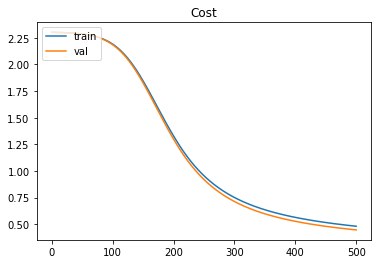

In [14]:
parameters = Model(X_train, Y_train, X_val, Y_val, layers_dims, epochs, learning_rate)